In [1]:
%matplotlib inline

from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from skimage.feature import graycomatrix, graycoprops

In [2]:
PATCH_SIZE = 21

In [3]:
PATCH_COORDS = {
    'Sea': [
        (113, 46),
        (157, 378),
        (563, 750),
        (632, 648),
        (449, 344),
    ],
    'Cloud': [
        (315, 560),
        (287, 242),
        (553, 81),
        (358, 524),
        (309, 160),
    ],
}

In [4]:
MARKERS = {
    'Sea': 'bo',
    'Cloud': 'ro',
}

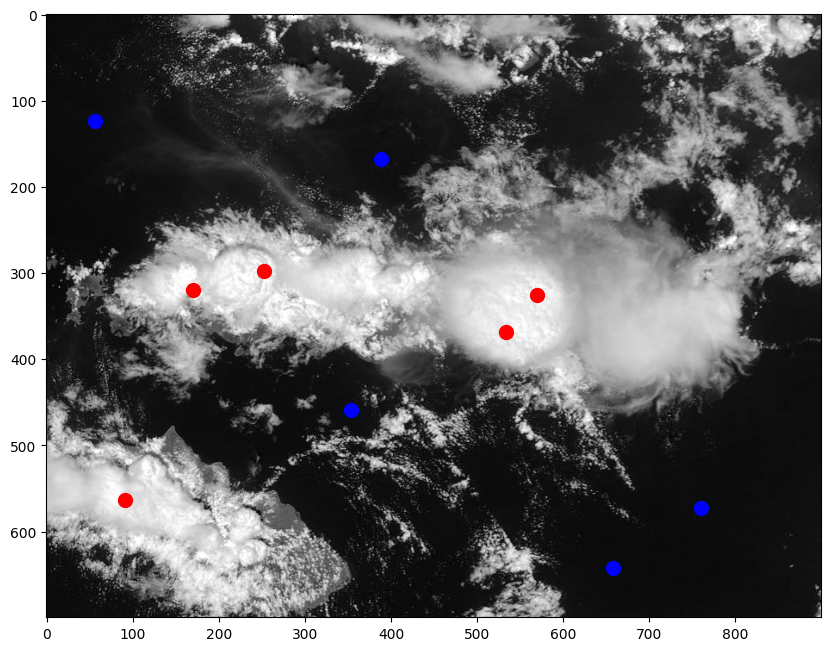

In [5]:
image = (io.imread('data/LB2/clouds_indonesia.jpg', as_gray=True) * 256).astype(np.uint8)

_, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.imshow(image, cmap=plt.cm.gray, vmin=0, vmax=255)
for name, coords in PATCH_COORDS.items():
    for y, x in coords:
        ax.plot(x + PATCH_SIZE // 2, y + PATCH_SIZE // 2, MARKERS[name], markersize=10)

In [6]:
PATCHES = defaultdict(list)

for name, coords in PATCH_COORDS.items():
    for x, y in coords:
        PATCHES[name].append(image[x:x + PATCH_SIZE, y:y + PATCH_SIZE])

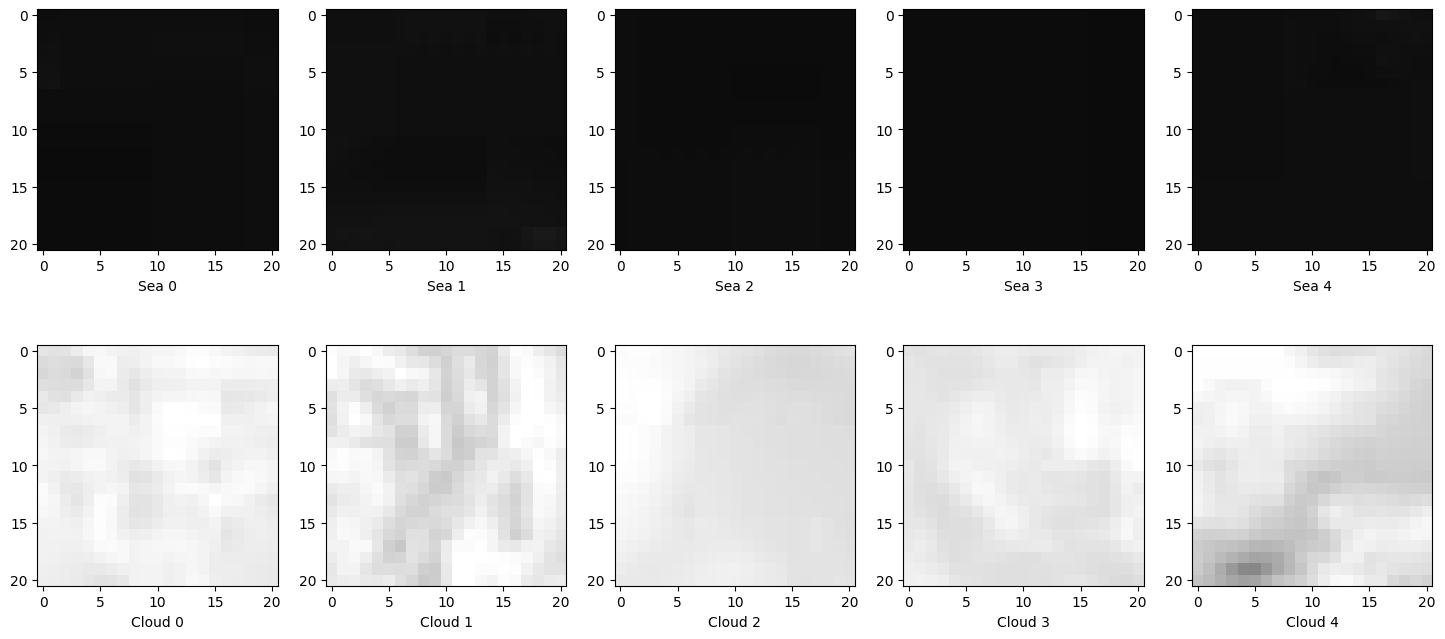

In [7]:
_, ax = plt.subplots(len(PATCHES), max(map(len, PATCHES.values())), figsize=(18, 8))

for i, (name, patches) in enumerate(PATCHES.items()):
    for j, patch in enumerate(patches):
        ax[i, j].imshow(patch, cmap=plt.cm.gray, vmin=0, vmax=255)
        ax[i, j].set_xlabel(f'{name} {j}')

plt.show()

In [8]:
PATCH_GRAYCOPROPSES = defaultdict(list)

for name, patches in PATCHES.items():
    for patch in patches:
        glcm = graycomatrix(
            patch,
            distances=[5],
            angles=[0],
            levels=256,
            symmetric=True,
            normed=True,
        )
        PATCH_GRAYCOPROPSES[name].append((
            graycoprops(glcm, 'dissimilarity')[0, 0],
            graycoprops(glcm, 'correlation')[0, 0],
        ))

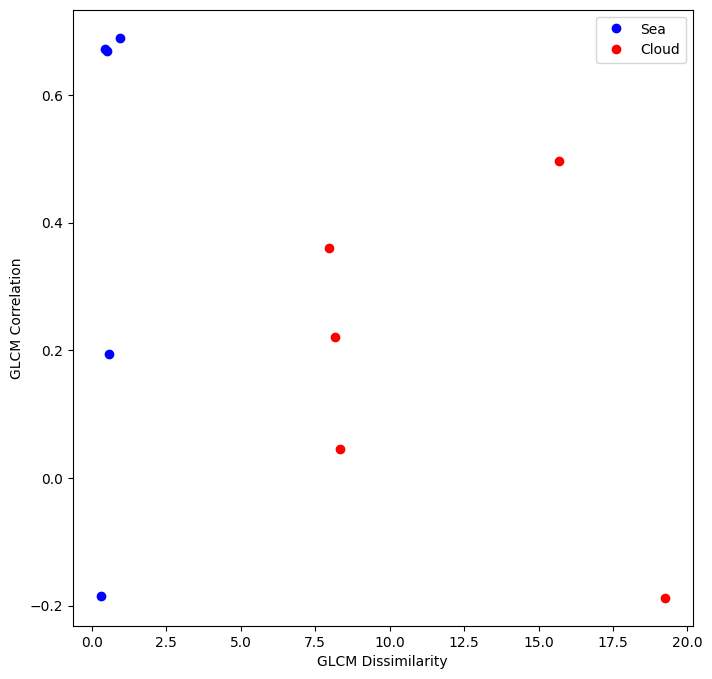

In [9]:
_, ax = plt.subplots(1, 1, figsize=(8, 8))

for name, coords in PATCH_GRAYCOPROPSES.items():
    ax.plot(*zip(*coords), MARKERS[name], label=name)

ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Correlation')
ax.legend()

plt.show()